# 1. 한눈에 보는 머신러닝

__참고:__ 오렐리앙 제롱의 [<핸즈온 머신러닝(2판)>](https://github.com/ageron/handson-ml2)
1장의 소스코드를 사용합니다.

## 주요 내용

1인당 [GDP(국내총생산)](https://ko.wikipedia.org/wiki/%EA%B5%AD%EB%82%B4%EC%B4%9D%EC%83%9D%EC%82%B0)와 삶의 만족도 사이의
선형 관계를 예측하는 모델의 훈련과정을 자세하게 소개한다.

**참고**

핸즈온 머신러닝(3판)은 2020년 데이터를 사용하지만 여기서는 2판에서 사용하는 2015년도 데이터를 사용한다.
2020년 데이터는 [연습문제](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/practices/practice_ml_landscape.ipynb)에서 다룬다.

## 기본 설정

파이썬 3.7 이상을 요구한다.

In [151]:
import sys
assert sys.version_info >= (3, 7)

In [152]:
from packaging import version
import sklearn

넘파이와 판다스 모듈은 필수적이다.

In [153]:
# 모듈: 넘파이와 판다스
import numpy as np
import pandas as pd

머신러닝 모델은 무작위 선택을 실행한다.
실행 결과를 매번 동일하게 유지하기 위해 랜덤 시드를 지정한다.

In [154]:
# 랜덤 시드 설정: 동일한 실행 결과 얻기
np.random.seed(42)

그래프 출력에 필요한 기본 설정을 지정한다.

In [155]:
# 그래프 출력 설정
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

판다스 기본 설정

In [156]:
pd.set_option('display.max_columns', None)

## 선형 회귀 모델 구현

선형 회귀 모델의 구현과정은 일반적으로 아래 다섯 단계로 이루어진다.

1. 문제 정의
1. 데이터 구하기
1. 데이터 적재, 정제, 전처리
1. 모델 선택과 훈련
1. 모델 활용

### 1단계: 문제 정의

어느 국가의 1인당 GDP가 알려졌을 때 해당 국가의 삶의 만족도를 예측하는 모델을 구현해야 한다.

### 2단계: 데이터 구하기

모델 훈련에 사용되는 훈련 셋은 __입력__ 데이터 셋과
__타깃__<font size="2">target</font> 데이터 셋으로 구분된다.
모델 훈련은 입력 데이터와 타깃 데이터 사이의 관계를 가장 적절하게
묘사하는 모델을 학습하는 과정이다.

1인당 GDP와 삶의 만족도 사이의 관계를 가장 적절하게 묘사하는 모델의 훈련에
사용되는 훈련 셋은 다음과 같다.

- 입력 데이터
    - 국가별 1인당 GDP 데이터
    - 출처: [국제통화기금(IMF)](https://ko.wikipedia.org/wiki/%EA%B5%AD%EC%A0%9C_%ED%86%B5%ED%99%94_%EA%B8%B0%EA%B8%88#:~:text=%EA%B5%AD%EC%A0%9C%20%ED%86%B5%ED%99%94%20%EA%B8%B0%EA%B8%88(%E5%9C%8B%E9%9A%9B%E9%80%9A%E8%B2%A8,%EC%9C%84%EC%9E%84%EB%B0%9B%EC%9D%80%20%EA%B5%AD%EC%A0%9C%20%EA%B8%B0%EA%B5%AC%EC%9D%B4%EB%8B%A4.)의
['세계 경제전망 데이터베이스'](http://goo.gl/j1MSKe).
- 타깃 데이터
    - [OECD](https://ko.wikipedia.org/wiki/%EA%B2%BD%EC%A0%9C%ED%98%91%EB%A0%A5%EA%B0%9C%EB%B0%9C%EA%B8%B0%EA%B5%AC)
    회원 국가별 '삶의 만족도'(life satisfaction) 데이터
    - 출처: OECD의
        ['더 나은 삶의 지수'(BLI, Better Life Index)](https://stats.oecd.org/Index.aspx?DataSetCode=BLI).

훈련 데이터 구하는 과정을 여기서는
특정 서버에 저장된 다음 두 개의 csv 파일을 다운로드하는 것으로 대체한다.

* gdp_per_capita_2015.csv
    - IMF(국제통화기금)에 제공하는 1인당 국내총생산 데이터(GDP) 데이터
* oecd_bli_2015.csv
    - 2015년도 기준 OECD 국가들의 '더 나은 삶의 지수'(BLI) 데이터

최종적으로 아래 표와 같은 데이터를 생성해야 하는데 언급된 데이터 파일을 다운로드 하면 전혀
다른 모양의 데이터가 파일에 포함되어 있다.
이어지는 3단계는 원본 데이터 파일에서 아래 모양의 표를 어떻게 유도해내는 과정을 자세히 보여준다.
하지만 과정이 조금 복잡하기에 여기서는 건너 뛴다.
자세한 내용은 [보다 자세히 설명된 주피터 노트북](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/notebooks/code_ml_landscape.ipynb)을 참고한다.

<p><div align="center"><img src="https://github.com/codingalzi/handson-ml3/blob/master/jupyter-book/imgs/ch01/gdp-bli-2015.png?raw=true" style="width:350px;"></div></p>

### 3단계: 데이터 적재, 정제, 전처리

여기서는 위 내용의 데이터가 csv 파일로 저장되어 있다고 가정하고
다운로드 형식으로 불러온 다음에 선형 머신러닝 모델의 훈련을 위한 데이터 준비와 훈련을 진행한다.

데이터가 저장된 서버 주소는 다음과 같다.

In [157]:
datapath = "https://raw.githubusercontent.com/codingalzi/handson-ml3/master/notebooks/data/lifesat/"

### 4단계: OECD 회원국의 GDP 데이터와 삶의 만족도 데이터

In [158]:
oecd_country_stats = pd.read_csv(datapath + "oecd_bli_2020.csv")
oecd_country_stats.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [159]:
oecd_country_stats

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


국가명을 인덱스로 지정한다.

In [160]:
oecd_country_stats.set_index("Country", inplace=True)
oecd_country_stats.head()

,LOCATION,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Country,,,,,,,,,,,,,,,,
Australia,AUS,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
Austria,AUT,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
Belgium,BEL,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
Canada,CAN,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
Czech Republic,CZE,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


1인당 GDP와 삶의 만족도 사이의 선형 관계를 눈으로 확인하기 위해 국가를
1인당 GDP 기준 오름차순으로 정렬시킨다.

In [161]:
oecd_country_stats.sort_values(by="GDP per capita", inplace=True)

KeyError: 'GDP per capita'

- GDP가 가장 낮은 5 개국

In [ ]:
oecd_country_stats.head()

,LOCATION,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Country,,,,,,,,,,,,,,,,
Australia,AUS,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
Austria,AUT,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
Belgium,BEL,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
Canada,CAN,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
Czech Republic,CZE,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


- GDP가 가장 높은 5 개국

In [ ]:
oecd_country_stats.tail()

,LOCATION,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Country,,,,,,,,,,,,,,,,
Lithuania,LTU,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
Colombia,COL,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
Lithuania,LTU,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
Colombia,COL,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN
Lithuania,LTU,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,0.43,NaN,NaN


#### 추가 설정

선형 회귀 모델을 훈련시킬 때 발생할 수 있는 과대적합 문제를 설명하기 위해
고의로 7개 국가의 데이터를 데이터 셋에서 제외시키고 훈련 시킬 때와
그렇지 않을 때를 비교한다.

제외 대상 국가는 브라질, 멕시코, 칠레, 체코, 노르웨이, 스위스, 룩셈부르크 이다.
데이터프레임에서 아래 인덱스를 이용하여 7개 국가를 제외시키고 훈련을 시킬 것이다.

In [ ]:
omitted_indices = [0, 1, 6, 8, 33, 34, 35]

kept_indices = list( set(range(36)) - set(omitted_indices) )

제외된 7개 국가의 1인당 GDP와 삶의 만족도 데이터는 다음과 같다.

In [ ]:
missing_data = oecd_country_stats.iloc[omitted_indices]

missing_data

,LOCATION,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Country,,,,,,,,,,,,,,,,
Australia,AUS,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
Austria,AUT,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
Finland,FIN,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
Germany,DEU,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
OECD - Total,OECD,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,7.0,NaN,NaN
Australia,AUS,JE_LMIS,Labour market insecurity,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,5.9,NaN,NaN
Austria,AUT,JE_LMIS,Labour market insecurity,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,4.2,NaN,NaN


7개 국가를 제외한 국가들의 1인당 GDP와 삶의 만족도 데이터를 지정한다.

In [ ]:
sample_data = oecd_country_stats.iloc[kept_indices]

### 5단계: 모델 선택과 훈련

#### 선형 관계 확인

아래 코드는 앞서 언급된 7개 국가의 데이터를 제외한 국가들의 1인당 GDP와
삶의 만족도 사이의 관계를 산점도로 나타낸다.
선형관계를 잘 보여주는 다음 다섯 개 국가는 빨간색 점으로 표시한다.

* 헝가리(Hungary)
* 대한민국(Korea)
* 프랑스(France)
* 호주(Australia)
* 미국(United States)

KeyError: 'GDP per capita'

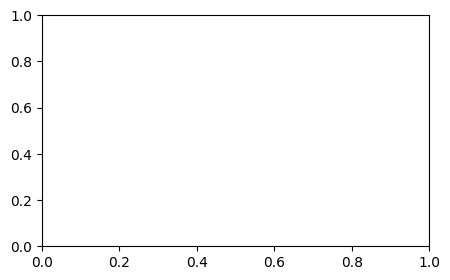

In [ ]:
# 7개 국가를 제외한 국가들의 데이터 산점도
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# 언급된 5개 국가명과 좌표
position_text = {
    "Hungary": (7000, 1),
    "Korea": (24000, 1.7),
    "France": (33000, 2.2),
    "Australia": (43000, 2.7),
    "United States": (52000, 3.8),
}

# 5개 국가는 좌표를 이용하여 빨강색 점으로 표기
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]            # 5개 국가의 지표

    # 5개 국가명 표기
    country = "U.S." if country == "United States" else country  # 미국은 U.S. 로 표기

    # 화살표 그리기
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5) )

    # 5개 국가 산점도 그리기: 빨강색 점
    plt.plot(pos_data_x, pos_data_y, "ro")

# x 축 제목 새롭게 지정
plt.xlabel("GDP per capita (USD)")

plt.show()

언급된 5개 국가의 1인당 GDP와 삶의 만족도를 데이터에서 직접 확인하면 다음과 같다.

In [162]:
sample_data.loc[list(position_text.keys())]

KeyError: "['Australia'] not in index"

위 산점도에 따르면 1인당 GDP와 삶의 만족도가 어느 정도 선형 관계에 있는 것처럼 보인다.

#### 선형 회귀 모델

직선처럼 y 축의 값이 x 축의 값에 선형적으로 의존하는 관계를 __선형관계__라 하며,
그런 선형관계를 함수로 구현하는 모델을 __선형 회귀 모델__(linear regression model)이라 한다.
선형 회귀 모델은 직선을 나타내는 1차 함수의 그래프로 표현되며,
직선은 절편(y축과 만나는 점)과 기울기 두 개의 값에 의해 정해진다.

예를 들어, 1인당 GDP와 삶의 만족도 사이에 다음 선형 관계가 성립하도록 하는
절편 $\theta_0$ 와 기울기 $\theta_1$ 을 구해야 한다.

$$
\text{삶의만족도} = \theta_0 + (\text{1인당GDP}) \cdot \theta_1
$$

$\theta_0$ 와 $\theta_1$ 처럼 모델 구현에 사용되는 값들을 모델의
__파라미터__<font size="2">parameter</font>라 하며,
모델의 파라미터를 찾아내는 것이 머신러닝 모델훈련의 핵심이다.

#### 사이킷런 라이브러리 활용

**사이킷런**<font size="2">scikit-learn</font> 라이브러리는 머신러닝에서 사용되는
다양한 모델을 제공한다.
선형 회귀의 경우 `LinearRegression` 클래스의 객체를 생성하여 훈련시키면
최적의 절편과 기울기를 계산해준다.

사이킷런의 모델을 지정하고 훈련시키는 과정은 다음과 같다.

**과정 1: 모델 지정**

사이킷런(sklearn) 패키지의 `linear_model` 모듈에 포함된 `LinearRegression` 클래스의 객체를 선언한다.
선언된 모델은 아직 어떤 훈련도 하지 않은 상태이다.

**과정 2: 훈련 셋 지정**

입력 데이터 셋은 x 축에, 타깃 데이터 셋은 y 축에 해당한다.

* 입력 데이터: 1인당 GDP
* 타깃 데이터: 삶의 만족도

입력 데이터와 타깃 데이터를 2차원 어레이로 지정한다.
사이킷런의 선형 회귀 모델이 2차원 어레이 형식의 입력 데이터 셋과 타깃 데이터 셋을 요구한다.
넘파이의 `c_` 함수를 활용해서 차원을 늘려준다.

In [ ]:
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
Xsample.shape, ysample.shape

변환 전의 처음 5개 데이터는 다음과 같다.

In [ ]:
np.array(sample_data["GDP per capita"][:5])

2차원 어레이로 변환 된 입력 데이터의 처음 5개는 다음과 같다.

In [ ]:
Xsample[:5]

타깃 데이터 또한 마찬가지이다.

In [ ]:
ysample[:5]

**과정 3: 모델 훈련**


선형 모델의 `fit()` 메서드를 지정된 입력 데이터 셋과 타깃 터이터 셋을
인자로 사용해서 호출하면
최적의 $\theta_0$와 $\theta_1$ 파라미터를 찾는 훈련이 실행되며
훈련이 종료되면 최적의 파라미터가 업데이트된 객체 자신이 반환된다.

In [ ]:
lin1.fit(Xsample, ysample)

훈련된 모델이 알아낸 최적 선형 모델의 절편과 기울기는 아래 두 속성에 저장된다.

* `intercept_[0]`: 직선의 절편
* `coef_[0]`: 직선의 기울기

In [ ]:
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"절편:\t {t0}")
print(f"기울기:\t {t1}")

구해진 기울기와 절편을 이용하여 산점도와 함께 직선을 그리면 다음과 같다.

In [ ]:
# 산점도
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])

# 직선 그리기
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")

# 직선의 절편과 기울기 정보 명시
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

### 6단계: 모델 활용

한 국가의 1인당 GDP가 알려졌을 때
훈련된 모델에 포함된 $\theta_0$ 와 $\theta_1$ 을 이용하여
해당 국가의 삶의 만족도를 예측한다.
예를 들어, OECD에 속하지 않는 베트남(Vietnam)의 1인당 GDP를 이용하여
베트남 국민의 삶의 만족도를 예측한다.

In [ ]:
# vietnam_gdp_per_capita_2015 = gdp_per_capita_2015.loc["Vietnam"]["GDP per capita"]

vietnam_gdp_per_capita_2015 = 2088.344

훈련된 모델의 `predict()` 메서드가 아래 식을 이용하여 삶의 만족도를 계산한다.

$$
\theta_0 + (\text{1인당GDP}) \cdot \theta_1
$$

베트남 국민의 삶의 만족도는 4.96 정도로 예측된다.

In [ ]:
lin1.predict([[vietnam_gdp_per_capita_2015]])

결과가 2차원 어레이로 표현됨에 주의한다.
이는 `predict()` 메서드가 여러 개의 입력값에 대해 동시에 예측값을 계산하기 때문이다.
위 코드에서는 한 개의 입력값에 대한 예측값인 `[4.95562275]`를 계산하였다.

이 예측값 또한 1차원 어레이로 표시된 이유는 머신러닝 모델은 기본적으로 하나의 입력값에 대해
여러 종류의 예측값을 계산하기 때문이다.
그리고 여기서는 삶의 만족도 한 종류의 값만 예측하기 때문이 길이가 1인 어레이가 계산되었다.
따라서 베트남의 1인당 GDP는 인덱싱으로 바로 확인된다.

In [ ]:
vietnam_predicted_life_satisfaction = lin1.predict([[vietnam_gdp_per_capita_2015]])[0, 0]

print("베트남 삶의 만족도:", vietnam_predicted_life_satisfaction)

## 머신러닝의 모델 훈련의 어려움

머신러닝 알고리즘을 훈련시키다보면 다양한 어려움에 부딪힌다.
여기서는 선형 회귀 모델이 훈련셋에 민감하게 반응하는 것을 보인다.

### 훈련 데이터 추가

앞서 제외시킨 7개 국가의 데이터를 포함해서 선형 회귀 모델을 훈련시켜 보자.
제외된 7개 국가의 데이터는 다음과 같다.

* 브라질(Brazil)
* 멕시코(Mexico)
* 칠레(Chile)
* 체코(Czech Repulic)
* 노르웨이(Norway)
* 스위스(Switzerland)
* 룩셈부르크(Luxembourg)

In [ ]:
missing_data

아래 좌표는 7개 국가명을 아래 그래프에서 표기할 때 사용할 좌표이다.

In [ ]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

7개 국가를 포함한 전체 훈련 데이터 셋을 이용하여 훈련한 결과를
7개 국가를 제외했을 때의 훈련 결과와 비교한다.

* 검정 실선: 7개 국가 포함 예측 선형 모델
* 파랑 점선: 7개 국가 제외 예측 선형 모델

In [ ]:
# 7개 국가를 제외한 국가들의 산점도 (파랑색 점)
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# 7개 국가 산점도(빨강 점)
for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    # 7개 국가명 표기
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

# 7개 국가 제외 예측 선형 모델 그래프 (파랑 점선)
X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

# 7개 국가 포함 선형 회귀 모델 훈련 및 예측
lin_reg_full = LinearRegression()
Xfull = np.c_[oecd_country_stats["GDP per capita"]]
yfull = np.c_[oecd_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

# 7개 국가 포함 예측 선형 모델 그래프(검정 실선)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

plt.show()

결론적으로 7개 국가를 포함하는 경우와 그렇지 않은 경우
상당히 다른 선형 회귀 모델이 훈련된다.
즉, 모델 훈련이 훈련 데이터 셋에 민감하게 반응하는 **과대 적합** 현상이 발생한다.
이런 의미에서 선형 회귀 모델은 1인당 GDP와 삶의 만족도 사이의 관계를 모델링 하기에 부적절하다고 말할 수 있다.